Визначити фрактальну розмірність фрактала на площині, що складається з 
точок (𝑥; 𝑦), де 𝑥 ∈ [0; 1], 𝑦 ∈ [0; 1], причому в системі числення за основою 
5 в записі числа 𝑥 відсутні цифри 1 та 3, а в записі числа 𝑦 відсутні цифри 0, 2 
та 4.

In [109]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [110]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [111]:
def num_to_base_5_str(n):
    return "".join(str(i) for i in numberToBase(n, 5))

In [112]:
# from pprint import pprint
def create_fractions(iterations):
    matrix = np.ones((1, 1))
    scale = 1
    fig, ax = plt.subplots(iterations+1, figsize=(20, 8*iterations))
    ax[0].imshow([matrix], cmap='gray')
    ax[0].set_title(f"Ітерація №{0}")
    for it in range(1, iterations+1):
        
        matrix = np.array([[0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix]])
        matrix_to_show = 1-np.reshape(matrix, (matrix.size//(matrix.shape[0]**it), matrix.size//(matrix.shape[0]**it)))
        ax[it].imshow(matrix_to_show, cmap='gray')
        ax[it].set_title(f"Ітерація №{it}, fractal dim = {}")

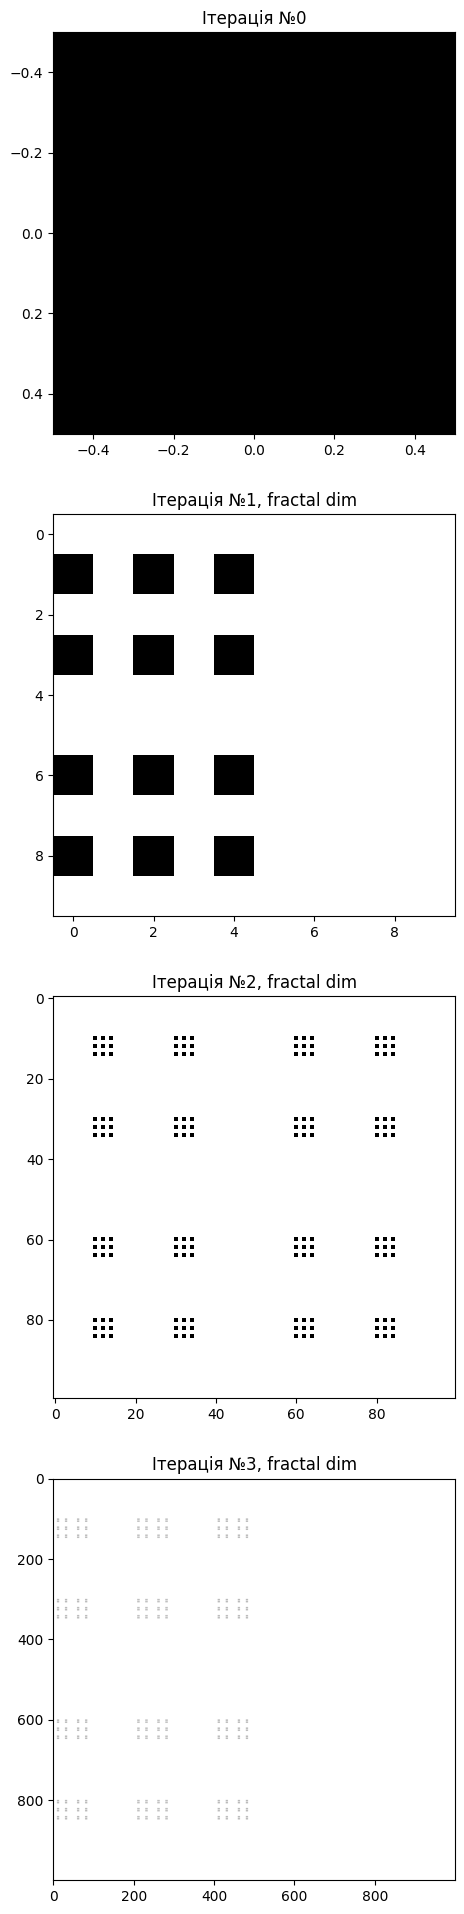

In [113]:
create_fractions(3)

In [114]:
for i in range(10):
    print(num_to_base_5_str(i))

0
1
2
3
4
10
11
12
13
14


import copy
base = 5

not_included_x = [1, 3]
not_included_y = [0, 2, 4]

xs = np.linspace(0,base-1, base, dtype=int)
ys = np.linspace(0,base-1, base, dtype=int)
xs = np.delete(xs, not_included_x)
ys = np.delete(ys, not_included_y)

M = np.zeros((base, base), dtype=int)
N=0
for x in xs:
    for y in ys:
        M[y][x] = 1
        N+=1
S = 1 - M
r = M.shape[0]
dim = np.log(N)/np.log(r)
plt.title(f'Fractal dimetion = {np.floor(dim)} < {dim} < {np.ceil(dim)}')
plt.imshow(S, cmap='gray')
plt.show()
plt.pause(2)

# M = np.ones((1, 1))  # Initial matrix
print(M)
for _ in range(2):
    M = M.tolist()
    M_copy = copy.deepcopy(M)
    print('M_LIST:', M_copy)
    N=0
    for i in range(len(M)):
        for j in range(len(M[0])):
            if(M[i][j] == 1):
                N+=1
                M[i][j] = np.array(M_copy)
            else:
                M[i][j] = np.zeros_like(M_copy)
    M = np.block(M)
    S = 1 - M
    r = M.shape[0]
    dim = np.log(N)/np.log(r)
    plt.title(f'Fractal dimetion = {np.floor(dim)} < {dim} < {np.ceil(dim)}')
    plt.imshow(S, cmap='gray')
    plt.show()
    plt.pause(2)